## Data Set
<br>
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">
    
1. S.No. : Serial Number.<br>
    
2. Name : Tên xe ô tô bao gồm Tên thương hiệu và Tên kiểu xe. <br>
    
3. Location : Vị trí mà chiếc xe đang được bán hoặc có sẵn để mua trong thành phố. <br>
     
4. Year : Năm sản xuất của xe. <br>
    
5. Kilometers_driven : Tổng số km đã lái trên ô tô của (các) chủ sở hữu trước đó .<br>
    
6. Fuel_Type : Loại nhiên liệu được sử dụng bởi ô tô. (Xăng, Diesel, Điện, CNG, LPG) <br>
    
7. Transmission : Loại hộp số được sử dụng bởi ô tô. (Automatic / Manual)<br>
    
8. Owner : Loại hình sở hữu.<br>
    
9. Mileage : Số dặm tiêu chuẩn do công ty xe hơi cung cấp tính bằng kmpl hoặc km / kg <br>
    
10. Engine : Thể tích dịch chuyển của động cơ tính bằng CC.<br>
    
11. Power : Công suất cực đại của động cơ tính bằng bhp.<br>
    
12. Seats : Số lượng chỗ ngồi trên xe.<br>
    
13. New_Price : Giá của một chiếc ô tô mới cùng mẫu tính bằng INR Lakhs.(1 Lakh = 100, 000)<br>
    
14. Price : Giá của chiếc xe đã qua sử dụng tính bằng INR Lakhs (1 Lakh = 100, 000)<br>
</p>

## Problem
<p style = "font-size : 15px ; color: black;font-family:TimesNewRoman">

- Các yếu tố ảnh hưởng tới giá một chiếc xe đã qua sử dụng .?<br>
- Những biến độc lập ảnh hưởng đến giá của một chiếc xe đã qua sử dụng?<br>
- Tên của chiếc xe có ảnh hưởng tới giá của nó?<br>
- Loại bỏ Transmission ảnh hưởng đến giá bằng cách nào?<br>
- Vị trí nơi chiếc xe đang được bán có ảnh hưởng gì đến giá không?<br>
- Quãng đường xe đã đi, năm sản xuất có tương quan nghịch với giá xe không?<br>
- Động cơ và Công suất có ảnh hưởng gì đến giá xe không?<br>
- Số lượng ghế ngồi và loại nhiên liệu sử dụng có ảnh hưởng đến định giá không?<br>
</p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
file_name = 'D:/ĐỒ ÁN/DoAn2/dữ liệu/data1/used_cars_data.csv'
df = pd.read_csv(file_name, index_col=0)
cars=df.copy()
cars.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
cars.tail(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


In [5]:
#kich thuoc cua bo du lieu
print("Kich thuoc:")
print("Rows : ", cars.shape[0])
print("Columns : ", cars.shape[1])
print("-"*75,"\n","Thuoc_tinh : ", cars.columns.tolist())
# kiem tra o du lieu trong trong data
print("-"*75,"\n", "Du lieu trong: ","\n",
      cars.isnull().sum().sort_values(ascending=False)) 
# kiem tra ty le du lieu bi trong trong cot
print("-"*75,"\n", "Ty le du lieu trong: ", "\n",
     round(cars.isna().sum()/ cars.isna().count()*100,2))

Kich thuoc:
Rows :  7253
Columns :  13
--------------------------------------------------------------------------- 
 Thuoc_tinh :  ['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']
--------------------------------------------------------------------------- 
 Du lieu trong:  
 New_Price            6247
Price                1234
Seats                  53
Engine                 46
Power                  46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
dtype: int64
--------------------------------------------------------------------------- 
 Ty le du lieu trong:  
 Name                  0.00
Location              0.00
Year                  0.00
Kilometers_Driven     0.00
Fuel_Type             0.00
Transmission          0.00
Owne

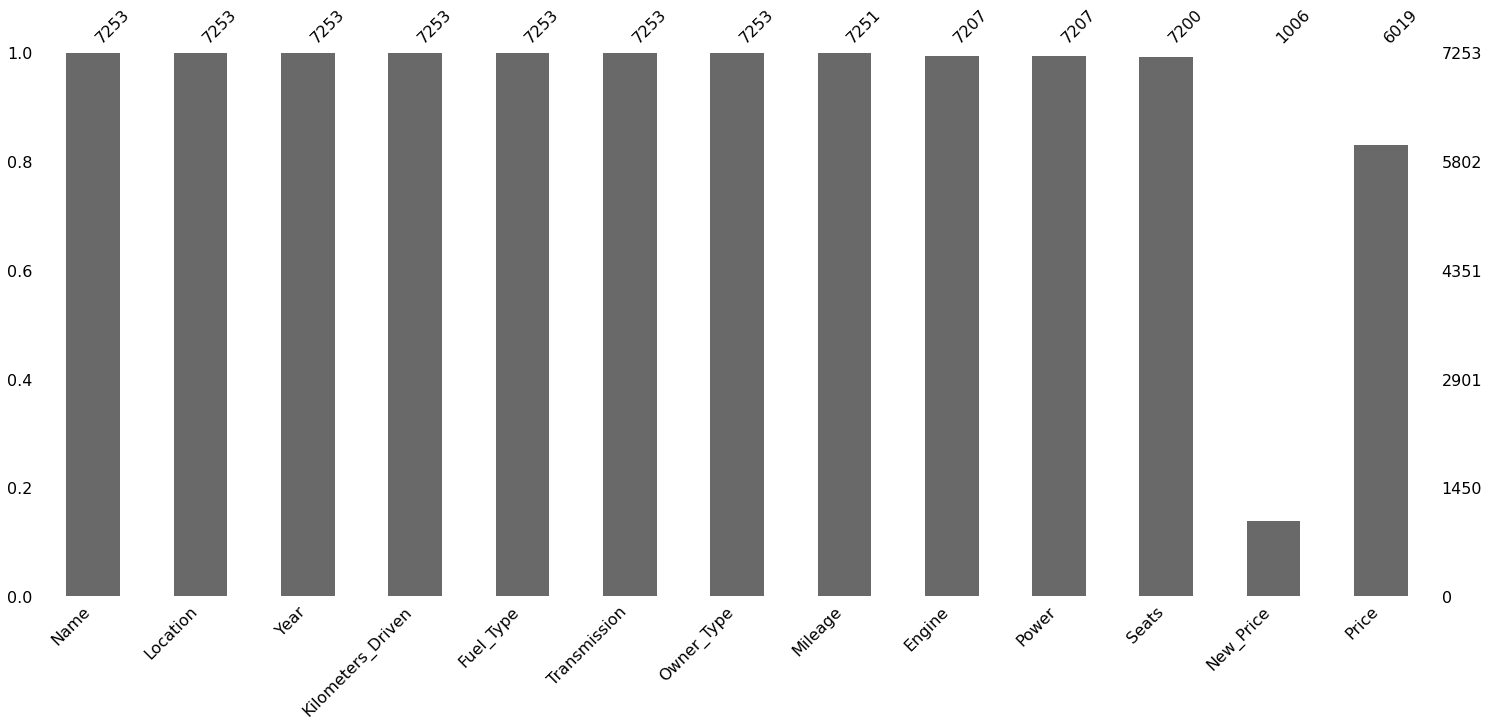

In [6]:
#hinh dung cac gia tri bi thieu
import missingno as msno
msno.bar(cars)

In [7]:
cars.drop(['New_Price'],axis=1, inplace=True)

In [8]:
# Lap danh sach tat ca cac bien category
cat_col = [
    "Fuel_Type",
    "Location",
    "Transmission",
    "Seats",
    "Year",
    "Owner_Type",
    
]
# in ra so luong nhung doi tuong co gia tri duy nhat
for column in cat_col:
    print(cars[column].value_counts())
    print("-" * 75)

Diesel      3852
Petrol      3325
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
---------------------------------------------------------------------------
Mumbai        949
Hyderabad     876
Kochi         772
Coimbatore    772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
---------------------------------------------------------------------------
Manual       5204
Automatic    2049
Name: Transmission, dtype: int64
---------------------------------------------------------------------------
5.0     6047
7.0      796
8.0      170
4.0      119
6.0       38
2.0       18
10.0       8
9.0        3
0.0        1
Name: Seats, dtype: int64
---------------------------------------------------------------------------
2015    929
2014    925
2016    886
2013    791
2017    709
2012    690
2011    579
2010    407
2018    361
2009    252
2008    207
2007    14

# Kiểm tra các giá trị NULL, NAN và xóa bỏ đơn vị đo


### Mileage

In [9]:
# xóa đi các đơn vị đo trong giá trị dữ liệu
cars["Mileage"] = cars["Mileage"].str.rstrip(" kmpl")
cars["Mileage"] = cars["Mileage"].str.rstrip(" km/g")

In [10]:
#Kiem tra có giá trị 0 nào không ?
print("So gia tri 0 trong Mileage: ",cars.query("Mileage == '0.0'")['Mileage'].count())

So gia tri 0 trong Mileage:  81


### Power

In [11]:
cars["Power"] = cars["Power"].str.rstrip(" bhp")
#cars[cars.Power=='null'].Power

In [12]:
typeoffuel=['null']
cars.loc[cars.Power.isin(typeoffuel)].head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
S.No.,,,,,,,,,,,,
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8,1399 CC,null,5.0,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086 CC,null,5.0,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0,1086 CC,null,5.0,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0,1086 CC,null,5.0,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0,1086 CC,null,5.0,1.67


In [13]:
cars[cars.Power=='nan'].Power

Series([], Name: Power, dtype: object)

In [14]:
# Đổi các giá trị null thành NaN
cars["Power"]= cars["Power"].replace(regex="null", value = np.nan)

In [15]:
#Kiem tra có giá trị 0 nào không ?
print("So gia tri 0 trong Power: ",cars.query("Power == '0.0'")['Power'].count())

So gia tri 0 trong Power:  0


### Engine

In [16]:
cars["Engine"] = cars["Engine"].str.rstrip(" CC")

In [17]:
cars[cars.Engine=='null'].Power

Series([], Name: Power, dtype: object)

In [18]:
cars[cars.Power=='nan'].Power

Series([], Name: Power, dtype: object)

In [19]:
#Kiem tra có giá trị 0 nào không ?
print("So gia tri 0 trong Engine: ",cars.query("Engine == '0.0'")['Engine'].count())

So gia tri 0 trong Engine:  0


Trong cột Mileage có 81 giá trị 0, ta sẽ cần chuyển đổi nó thành NaN để coi nó là một giá trị bị thiếu cho dễ xử lý bộ dữ liệu

In [20]:
cars.loc[cars["Mileage"]=='0.0','Mileage']=np.nan

Kiểm tra các giá trị trong các côt

In [21]:
A =['Engine','Power','Mileage']
cars[A].nunique()

Engine     150
Power      385
Mileage    437
dtype: int64

In [22]:
cars[A].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

Như vậy, sau khi xử lý qua dữ liệu, ta có thể thấy trong cột Engine bị thếu 46 biến dữ liệu, trong cột Power bị thiếu 175 và cột Mileage là 83

### Seats


In [23]:
#Kiem tra có giá trị 0 nào không ?
print("So gia tri 0 trong Seats: ",cars.query("Seats == 0.0")['Seats'].count())

So gia tri 0 trong Seats:  1


In [24]:
cars.loc[cars["Seats"]==0.0,'Seats']=np.nan

In [25]:
#converting object data type to category data type
cars["Fuel_Type"] = cars["Fuel_Type"].astype("category")
cars["Transmission"] = cars["Transmission"].astype("category")
cars["Owner_Type"] = cars["Owner_Type"].astype("category")
#converting datatype  
cars["Mileage"] = cars["Mileage"].astype(float)
cars["Power"] = cars["Power"].astype(float)
cars["Engine"]=cars["Engine"].astype(float)

### Thêm bảng tuổi của xe

do bộ dữ liệu lấy từ năm 2021 nên sẽ chỉ tính đến năm 2021

In [26]:
cars['Current_year']=2021
cars['Ageofcar']=cars['Current_year']-cars['Year']
cars.drop('Current_year',axis=1,inplace=True)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8


In [27]:
#Xóa các dữ liệu trống trong cột Name
cars['Name'] = cars.dropna(subset=['Name'])
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8


In [28]:
cars['Name'].isnull().sum()

0

In [29]:
# Trich xuat thong tin hang xe, dong xe
cars['Brand'] = cars['Name'].str.split(' ').str[0]
cars['Model'] = cars['Name'].str.split(' ').str[1] + cars['Name'].str.split(' ').str[2]

In [30]:
print("Thuong hieu: ", cars.Brand.unique())

Thuong hieu:  ['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini' 'Hindustan' 'OpelCorsa']


In [31]:
cars.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8,Audi,A4New
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,2.35,9,Hyundai,EONLPG
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,3.50,8,Nissan,MicraDiesel
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,17.50,5,Toyota,InnovaCrysta
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,5.20,8,Volkswagen,VentoDiesel


In [32]:
#kiểm tra lại các kí tự hãng xe lạ
col=['ISUZU','Isuzu','Mini','Land']
cars[cars.Brand.isin(col)]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,
13,Land Rover Range Rover 2.2L Pure,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,7,Land,RoverRange
14,Land Rover Freelander 2 TD4 SE,Pune,2012,85000,Diesel,Automatic,Second,NaN,2179.0,115.00,5.0,17.50,9,Land,RoverFreelander
176,Mini Countryman Cooper D,Jaipur,2017,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,23.00,4,Mini,CountrymanCooper
191,Land Rover Range Rover 2.2L Dynamic,Coimbatore,2018,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,55.76,3,Land,RoverRange
228,Mini Cooper Convertible S,Kochi,2017,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,35.67,4,Mini,CooperConvertible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6919,ISUZU D-MAX V-Cross 4X4,Jaipur,2017,290000,Diesel,Manual,First,12.40,2499.0,134.00,5.0,NaN,4,ISUZU,D-MAXV-Cross
7132,Mini Clubman Cooper S,Pune,2017,2890,Petrol,Manual,First,13.80,1998.0,192.00,5.0,NaN,4,Mini,ClubmanCooper
7157,Land Rover Range Rover 2.2L Pure,Hyderabad,2015,49000,Diesel,Automatic,Second,12.70,2179.0,187.70,5.0,NaN,6,Land,RoverRange


Ta có thể thấy "ISUZU" và "Isuzu" là một. Hãng "Mini" và "Land" tên đầy đủ là "Mini Cooper", "Land Rover"

In [33]:
# chinh lai ten thuong hieu
cars.loc[cars.Brand == 'ISUZU','Brand']='Isuzu'
cars.loc[cars.Brand=='Mini','Brand']='Mini Cooper'
cars.loc[cars.Brand=='Land','Brand']='Land Rover'

In [34]:
#In ra số lượng xe các hãng trong dataset
cars.groupby(cars.Brand).size().sort_values(ascending =False)

Brand
Maruti           1444
Hyundai          1340
Honda             743
Toyota            507
Mercedes-Benz     380
Volkswagen        374
Ford              351
Mahindra          331
BMW               312
Audi              285
Tata              228
Skoda             202
Renault           170
Chevrolet         151
Nissan            117
Land Rover         67
Jaguar             48
Fiat               38
Mitsubishi         36
Mini Cooper        31
Volvo              28
Jeep               19
Porsche            19
Datsun             17
Isuzu               5
Force               3
Bentley             2
Lamborghini         1
OpelCorsa           1
Hindustan           1
Smart               1
Ambassador          1
dtype: int64

In [35]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Ageofcar,Brand,Model
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,11,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,6,Hyundai,Creta1.6
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,10,Honda,JazzV
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,9,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,8,Audi,A4New


# EDA dữ liệu

Ta đọc hiểu data với kiểu dữ liệu float gồm các cột 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Seats', 'Price', 'Ageofcar'

In [36]:
cars.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Ageofcar
count,7253.000000,7.253000e+03,7170.000000,7207.000000,7078.000000,7199.000000,6019.000000,7253.000000
mean,2013.365366,5.869906e+04,18.346527,1616.573470,112.765214,5.280456,9.479468,7.634634
std,3.254421,8.442772e+04,4.157910,595.285137,53.493553,0.809327,11.187917,3.254421
min,1996.000000,1.710000e+02,6.400000,72.000000,34.200000,2.000000,0.440000,2.000000
25%,2011.000000,3.400000e+04,15.300000,1198.000000,75.000000,5.000000,3.500000,5.000000
50%,2014.000000,5.341600e+04,18.200000,1493.000000,94.000000,5.000000,5.640000,7.000000
75%,2016.000000,7.300000e+04,21.100000,1968.000000,138.100000,5.000000,9.950000,10.000000
max,2019.000000,6.500000e+06,33.540000,5998.000000,616.000000,10.000000,160.000000,25.000000


Đánh giá phân phối của các biến

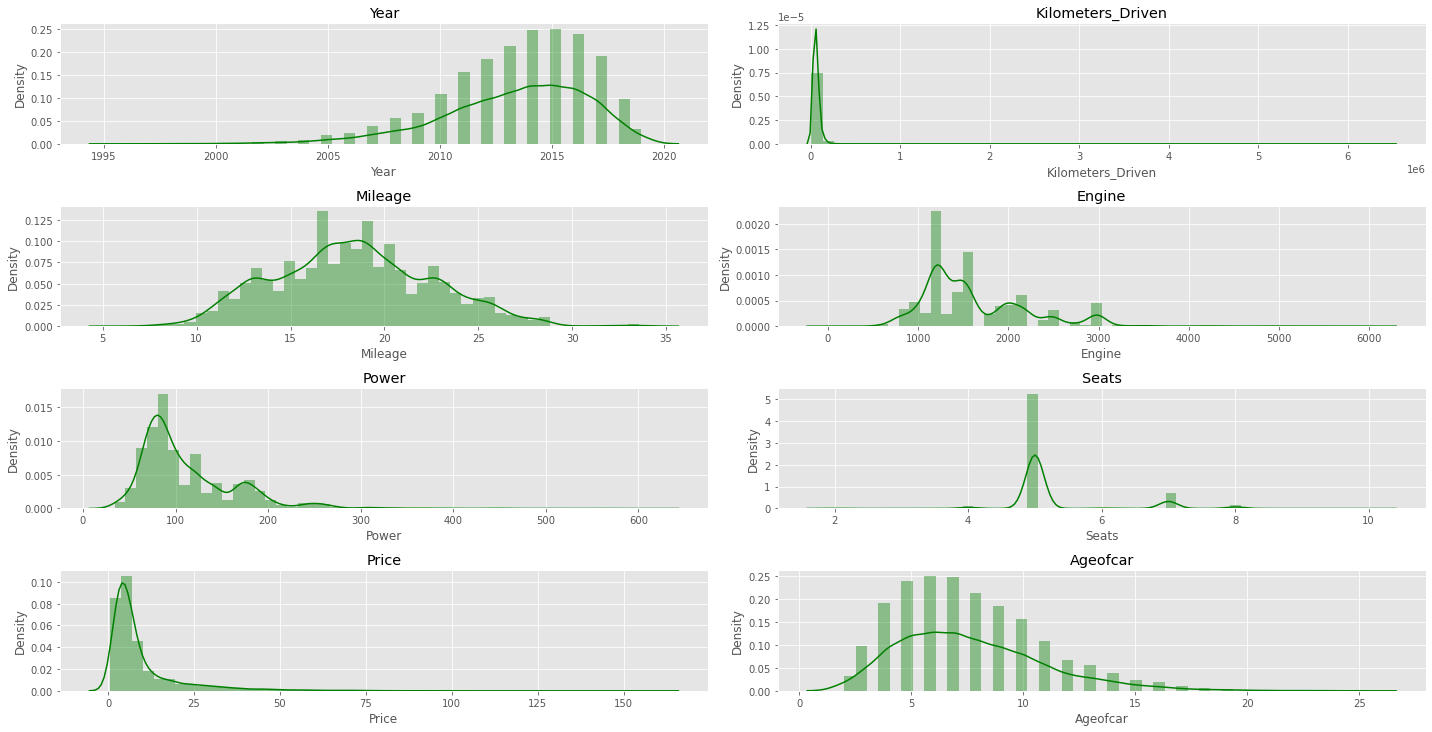

In [37]:
import warnings
import seaborn as sns
warnings.filterwarnings('ignore') # To supress warnings
plt.style.use('ggplot')
#Chọn các cột có kiểu dữ liệu là number
numeric_columns = cars.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
    #hiển thị 2 đồ thị trên một dòng 
    plt.subplot(10,2,i+1) 
    sns.distplot(cars[variable],kde=True,color='green')
    plt.tight_layout()
    plt.title(variable)
plt.savefig('D:/Phan_phoi_du_lieu.png')


Phân phối xác suất loga chuẩn thông thường bị lệch với đuôi phải dài do giá trị trung bình thấp và phương sai cao trong các biến ngẫu nhiên.

Ta có thể thấy rất rõ 2 biến 'Price' và 'Kilometers_Driven' có mức phân phối xác xuất không đều và bị lệch về bên phải. Ta có thể xác định chúng là thuộc phân phối lognormal. Vì thế ta sẽ sử dụng phép biến đổi logarit để đưa chúng về phân phối chuẩn để giảm độ nhiễu của dữ liệu


In [38]:
def Perform_log_transform(df,col_log):
    """#Perform Log Transformation of dataframe , and list of columns """
    for colname in col_log:
        df[colname + '_log'] = np.log(df[colname])
    #df.drop(col_log, axis=1, inplace=True)
    df.info()
Perform_log_transform(cars,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   7253 non-null   object  
 1   Location               7253 non-null   object  
 2   Year                   7253 non-null   int64   
 3   Kilometers_Driven      7253 non-null   int64   
 4   Fuel_Type              7253 non-null   category
 5   Transmission           7253 non-null   category
 6   Owner_Type             7253 non-null   category
 7   Mileage                7170 non-null   float64 
 8   Engine                 7207 non-null   float64 
 9   Power                  7078 non-null   float64 
 10  Seats                  7199 non-null   float64 
 11  Price                  6019 non-null   float64 
 12  Ageofcar               7253 non-null   int64   
 13  Brand                  7253 non-null   object  
 14  Model                  7252 non-null   o

In [39]:
cars2 = cars.drop(['Price','Kilometers_Driven'],axis=1)
cars2.head()

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Ageofcar,Brand,Model,Kilometers_Driven_log,Price_log
S.No.,,,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,CNG,Manual,First,26.60,998.0,58.16,5.0,11,Maruti,WagonR,11.184421,0.559616
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,Diesel,Manual,First,19.67,1582.0,126.20,5.0,6,Hyundai,Creta1.6,10.621327,2.525729
2,Honda Jazz V,Chennai,2011,Petrol,Manual,First,18.20,1199.0,88.70,5.0,10,Honda,JazzV,10.736397,1.504077
3,Maruti Ertiga VDI,Chennai,2012,Diesel,Manual,First,20.77,1248.0,88.76,7.0,9,Maruti,ErtigaVDI,11.373663,1.791759
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,8,Audi,A4New,10.613246,2.875822


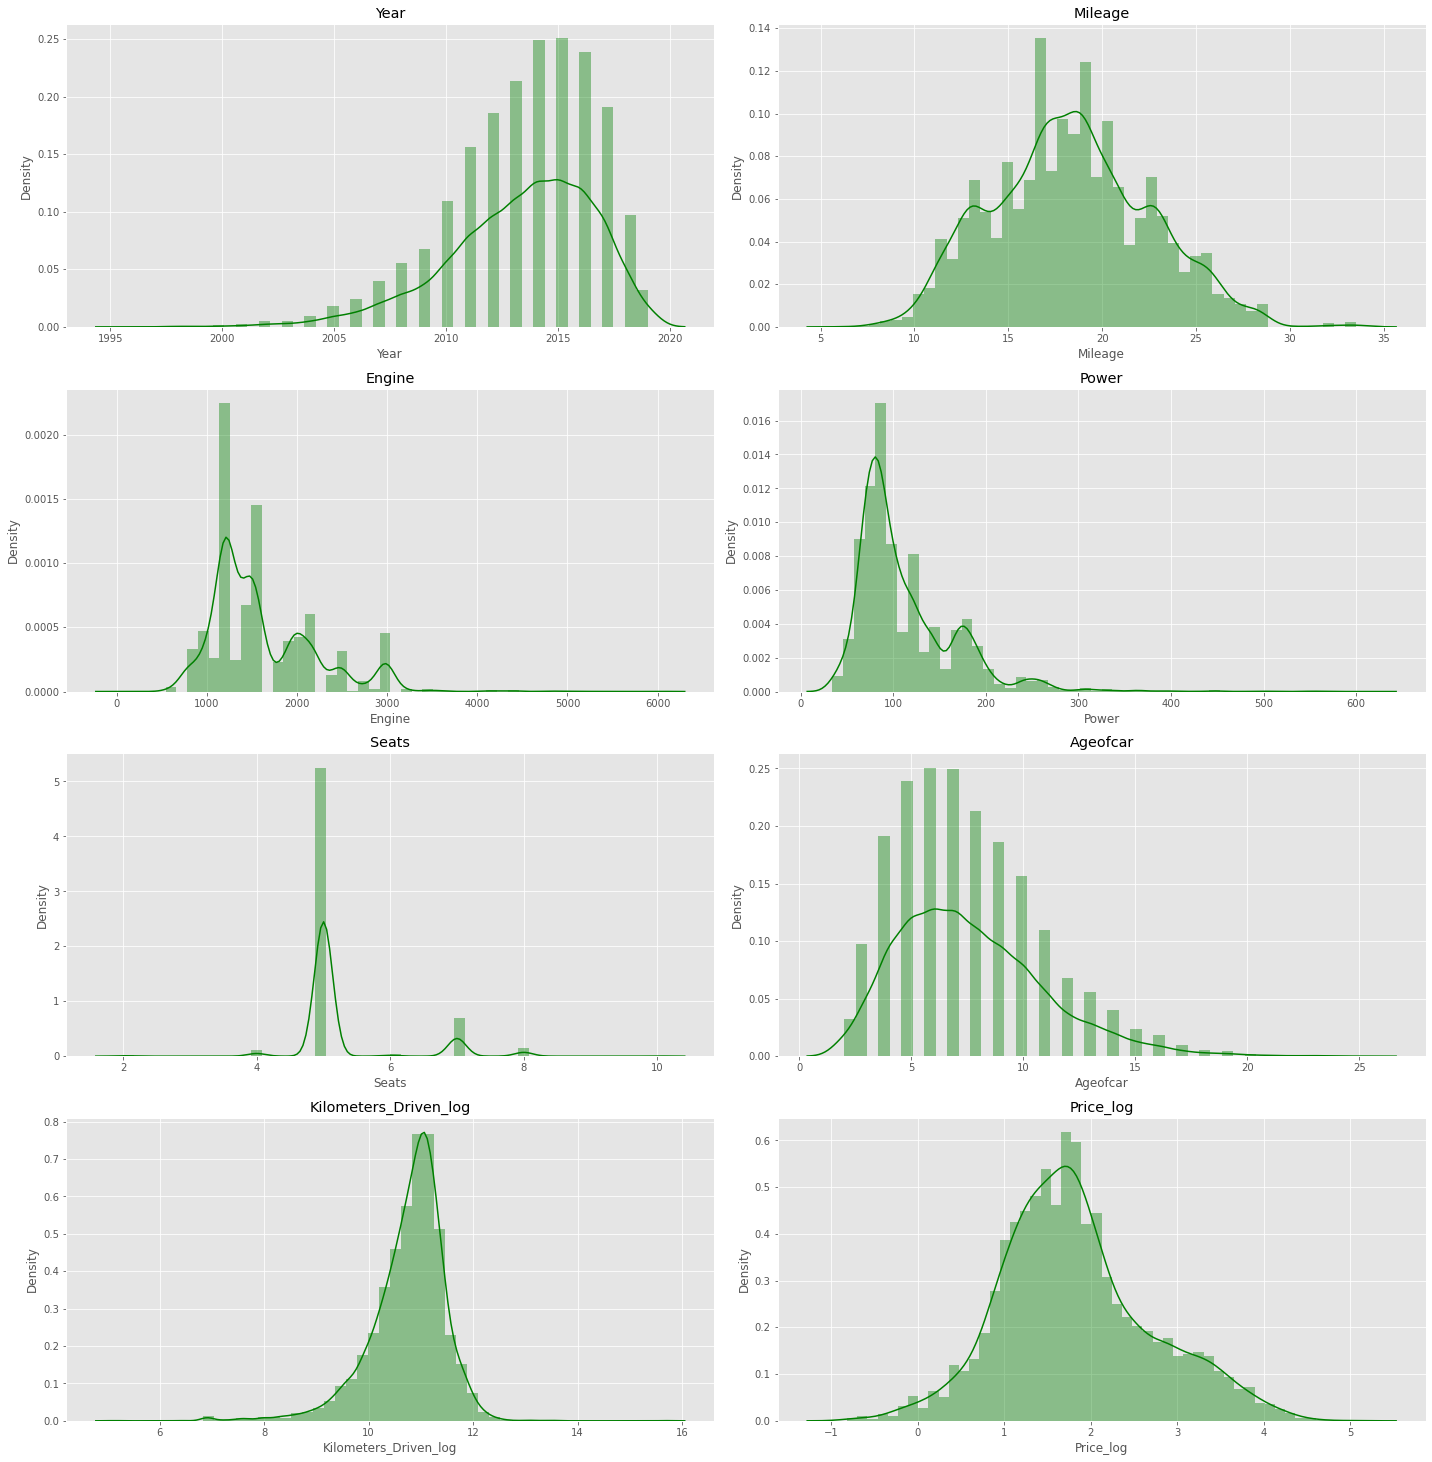

In [40]:
numeric_columns = cars2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(20,25))

for i, variable in enumerate(numeric_columns):
    #hiển thị 2 đồ thị trên một dòng 
    plt.subplot(5,2,i+1) 
    sns.distplot(cars2[variable],kde=True,color='green')
    plt.tight_layout()
    plt.title(variable)
plt.savefig('D:/Phan_phoi_du_lieu_moi.png')

Đánh giá mối liên hệ các biến trên với 'Price_log'

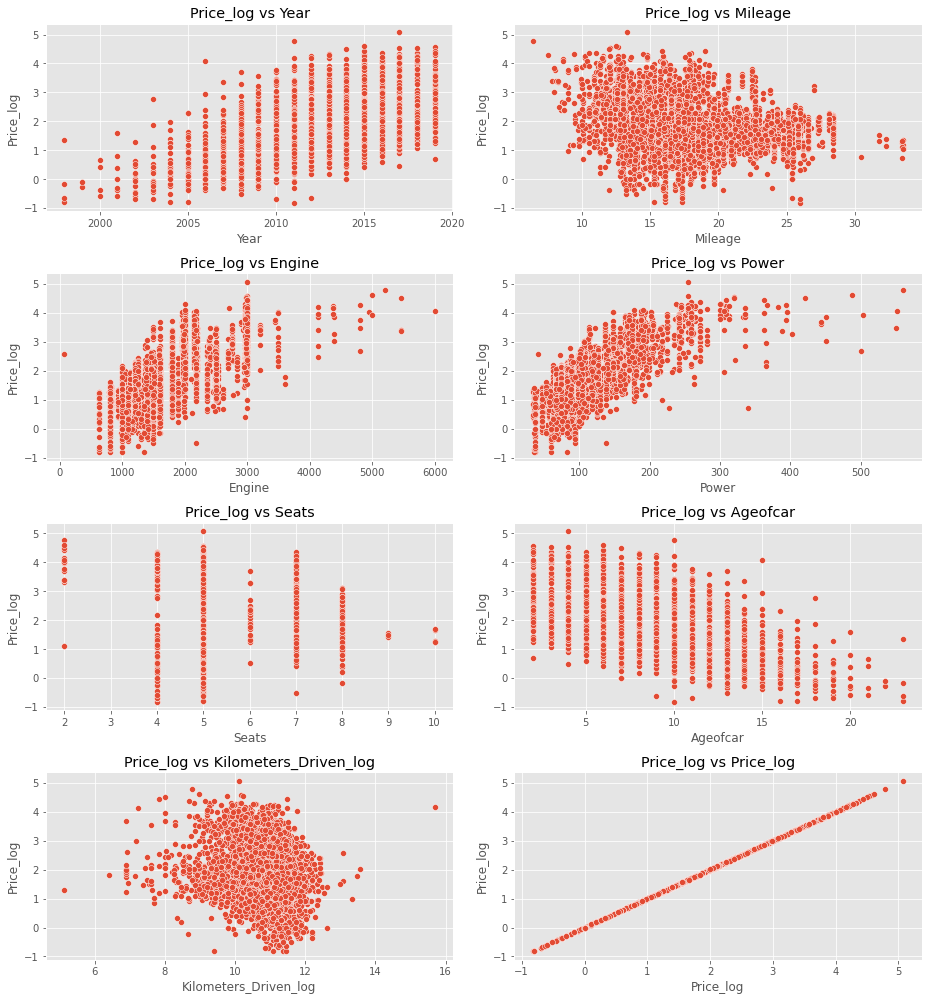

In [41]:
numeric_columns= numeric_columns = cars2.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(13,17))

for i, variable in enumerate(numeric_columns):
                     plt.subplot(5,2,i+1)
                     sns.scatterplot(x=cars2[variable],y=cars2['Price_log']).set(title='Price_log vs '+ variable)
                     #plt.xticks(rotation=90)
                     plt.tight_layout()

Bây giờ ta sẽ đánh giá các dữ liệu dạng 'category'

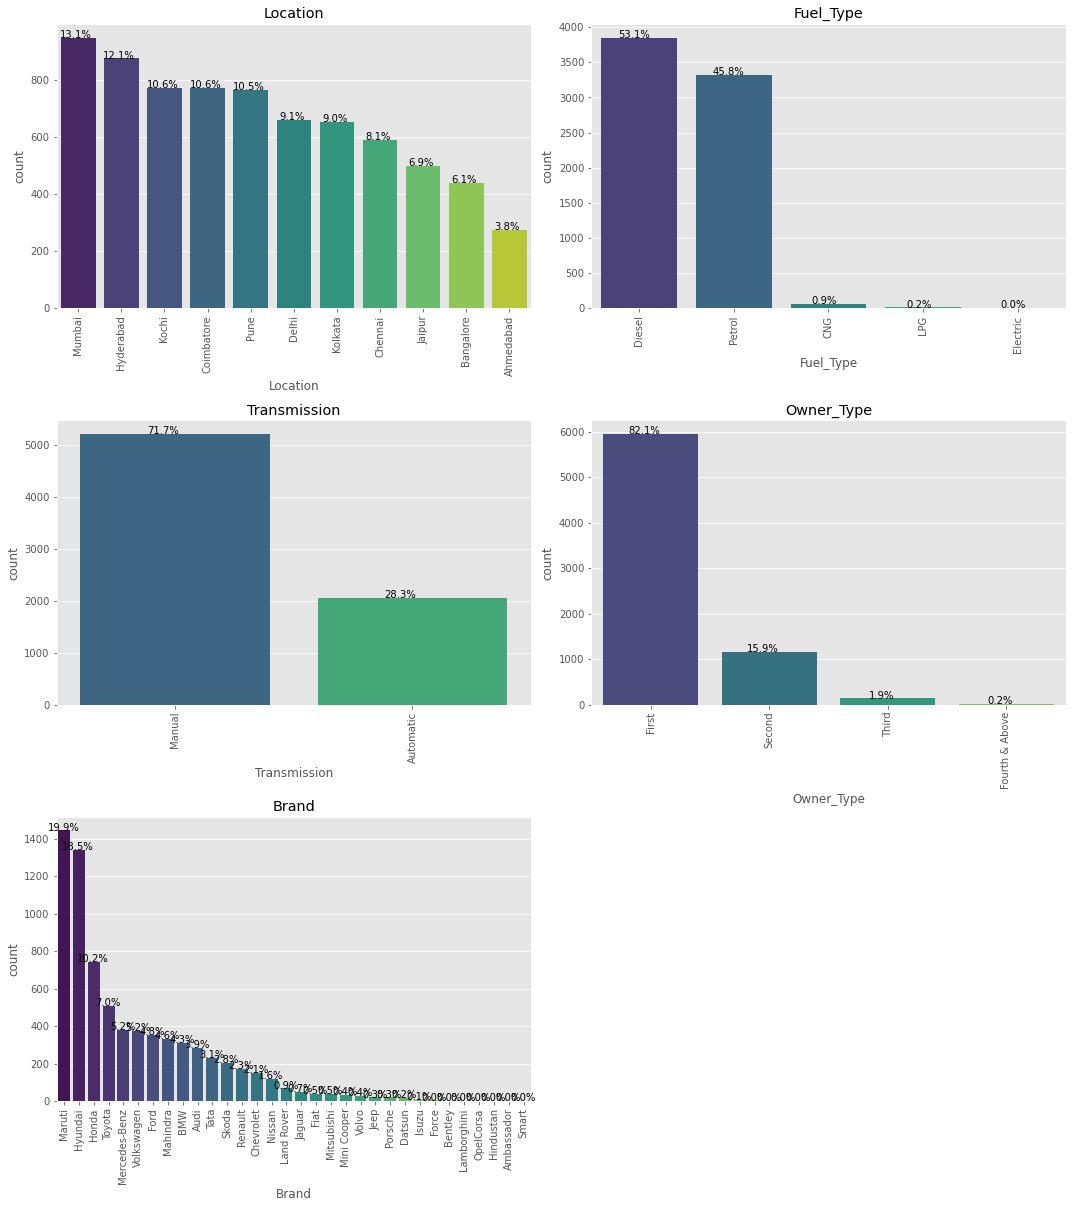

In [42]:
cat_columns=['Location','Fuel_Type','Transmission', 'Owner_Type', 'Brand'] 
# cat_columns = cars.select_dtypes(exclude=np.category).columns.tolist()

plt.figure(figsize=(15,21))

for i, variable in enumerate(cat_columns):
                     plt.subplot(4,2,i+1)
                     order = cars2[variable].value_counts(ascending=False).index    
                     ax=sns.countplot(x=cars2[variable], data=cars2 , order=order ,palette='viridis')
                     for p in ax.patches:
                           percentage = '{:.1f}%'.format(100 * p.get_height()/len(cars2[variable]))
                           x = p.get_x() + p.get_width() / 2 - 0.05
                           y = p.get_y() + p.get_height()
                           plt.annotate(percentage, (x, y),ha='center')
                     plt.xticks(rotation=90)
                     plt.tight_layout()
                     plt.title(variable)

# Xử lý các dữ liệu bị thiếu


In [43]:
cars2.isnull().sum()

Name                        0
Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    83
Engine                     46
Power                     175
Seats                      54
Ageofcar                    0
Brand                       0
Model                       1
Kilometers_Driven_log       0
Price_log                1234
dtype: int64

Tính toán giá trị thiếu trong hàng

In [44]:
# Dem so gia tri con thieu moi hang
num_missing = cars2.isnull().sum(axis=1)
num_missing.value_counts()

0    5844
1    1299
2      58
3      31
4      20
5       1
dtype: int64

In [45]:
#kiem tra gia tri con thieu cho moi bien
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nDoi voi cac hang co chinh xac {n} missing values, NAN duoc tim thay trong:')
        n_miss_per_col = cars2[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')

****************************** 
Doi voi cac hang co chinh xac 1 missing values, NAN duoc tim thay trong:
Mileage        30
Power          74
Seats           1
Price_log    1194
dtype: int64



****************************** 
Doi voi cac hang co chinh xac 2 missing values, NAN duoc tim thay trong:
Mileage      35
Power        50
Seats         6
Model         1
Price_log    24
dtype: int64



****************************** 
Doi voi cac hang co chinh xac 3 missing values, NAN duoc tim thay trong:
Mileage       6
Engine       25
Power        30
Seats        26
Price_log     6
dtype: int64



****************************** 
Doi voi cac hang co chinh xac 4 missing values, NAN duoc tim thay trong:
Mileage      11
Engine       20
Power        20
Seats        20
Price_log     9
dtype: int64



****************************** 
Doi voi cac hang co chinh xac 5 missing values, NAN duoc tim thay trong:
Mileage      1
Engine       1
Power        1
Seats        1
Price_log    1
dtype: int64





Điều này xác nhận rằng các cột nhất định có xu hướng bị thiếu cùng nhau hoặc tất cả không cùng nhau. Vì vậy, sẽ cố gắng lấp đầy các giá trị còn thiếu, càng nhiều càng tốt.

In [46]:
col=['Engine','Power','Mileage']
cars2[col].isnull().sum()

Engine      46
Power      175
Mileage     83
dtype: int64

Chúng ta có thể bắt đầu điền các giá trị còn thiếu bằng cách nhóm "Name" và "Year" để điền vào các giá trị còn thiếu với trung vị

In [47]:
cars2.groupby(['Name','Year'])['Engine'].median().head(30)

Name                                           Year
Ambassador Classic Nova Diesel                 2003    1489.0
Audi A3 35 TDI Attraction                      2014    1968.0
Audi A3 35 TDI Premium                         2016    1968.0
Audi A3 35 TDI Premium Plus                    2015    1968.0
                                               2016    1968.0
Audi A3 35 TDI Technology                      2017    1968.0
Audi A4 1.8 TFSI                               2010    1781.0
                                               2011    1781.0
Audi A4 1.8 TFSI Technology Edition            2012    1798.0
Audi A4 2.0 TDI                                2009    1968.0
                                               2011    1968.0
                                               2012    1968.0
                                               2013    1968.0
                                               2014    1968.0
Audi A4 2.0 TDI 177 Bhp Premium Plus           2013    1968.0
                  

In [48]:
cars2['Engine']=cars2.groupby(['Name','Year'])['Engine'].apply(lambda x:x.fillna(x.median()))
cars2['Power']=cars2.groupby(['Name','Year'])['Power'].apply(lambda x:x.fillna(x.median()))
cars2['Mileage']=cars2.groupby(['Name','Year'])['Mileage'].apply(lambda x:x.fillna(x.median()))
print(cars['Engine'].head(5))

S.No.
0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine, dtype: float64


In [49]:
cars2.groupby(['Brand','Model'])['Engine'].median().head(10)

Brand       Model      
Ambassador  ClassicNova    1489.0
Audi        A335           1968.0
            A41.8          1781.0
            A42.0          1968.0
            A43.0          2967.0
            A43.2          3197.0
            A430           1395.0
            A435           1968.0
            A4New          1968.0
            A62.0          1968.0
Name: Engine, dtype: float64

In [50]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model and year to get  more granularity and more accurate Engine and then fillig with median
cars2['Engine']=cars2.groupby(['Brand','Model'])['Engine'].apply(lambda x:x.fillna(x.median()))

In [51]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars2['Power']=cars2.groupby(['Brand','Model'])['Power'].apply(lambda x:x.fillna(x.median()))

In [52]:
#chosing Median to fill the the missing value as there are many outliers, 
#grouping by model to get more granularity and more accurate Engine
cars2['Mileage']=cars2.groupby(['Brand','Model'])['Mileage'].apply(lambda x:x.fillna(x.median()))

In [53]:
col=['Engine','Power','Mileage']
cars2[col].isnull().sum()

Engine     19
Power      64
Mileage    33
dtype: int64

Vẫn còn thiếu các giá trị. Ta sẽ nhóm theo Model for Engine và sau đó điền các giá trị bị thiếu vào giá trị trung bình. Đối với công suất và giá trị Mileage Engine cho một Thương hiệu có thể được sử dụng để nhận được giá trị chính xác hơn.

In [54]:
cars2.groupby(['Model','Year'])['Engine'].agg({'median','mean','max'}).sort_values(by='Model',ascending='True').head(10)

mean  median     max
Model   Year                             
1000AC  1998   970.000000   970.0   970.0
1Series 2013  1995.000000  1995.0  1995.0
        2015  1995.000000  1995.0  1995.0
370ZAT  2012  3696.000000  3696.0  3696.0
3Series 2018  1995.000000  1995.0  1995.0
        2017  1995.000000  1995.0  1995.0
        2016  1995.000000  1995.0  1995.0
        2015  1995.000000  1995.0  1995.0
        2014  2078.166667  1995.0  2993.0
        2013  2066.428571  1995.0  2993.0

In [55]:
cars2.groupby(['Brand','Engine'])['Power'].agg({'mean','median','max'}).head(10)

mean  median     max
Brand      Engine                            
Ambassador 1489.0   35.500000   35.50   35.50
Audi       1395.0  147.510000  147.51  147.51
           1781.0  163.200000  163.20  163.20
           1798.0  181.033333  187.74  187.74
           1968.0  167.123179  174.33  187.74
           1984.0  196.022000  207.90  226.60
           2698.0  179.500000  179.50  179.50
           2773.0  201.000000  201.00  201.00
           2894.0  444.000000  444.00  444.00
           2967.0  241.740000  241.40  246.70

In [56]:
cars2['Seats'].isnull().sum()

54

Nhóm với 'Name' sẽ cung cấp cho ta mức độ chi tiết hơn và giá trị 'Seats' gần chính xác hơn

In [57]:
cars2['Seats']=cars2.groupby(['Name'])['Seats'].apply(lambda x:x.fillna(x.median()))
cars2['Seats'].isnull().sum()

47

Nhóm với 'Model' sẽ cung cấp cho ta mức độ chi tiết hơn và giá trị 'Seats' gần chính xác hơn.

In [58]:
cars2['Seats']=cars2.groupby(['Model'])['Seats'].apply(lambda x:x.fillna(x.median()))
cars2['Seats'].isnull().sum()

24

In [59]:
cars2[cars2['Seats'].isnull()==True].head(10)

,Name,Location,Year,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Ageofcar,Brand,Model,Kilometers_Driven_log,Price_log
S.No.,,,,,,,,,,,,,,,
208,Maruti Swift 1.3 VXi,Kolkata,2010,Petrol,Manual,First,16.1,NaN,NaN,NaN,11,Maruti,Swift1.3,10.645449,0.746688
733,Maruti Swift 1.3 VXi,Chennai,2006,Petrol,Manual,Third,16.1,NaN,NaN,NaN,15,Maruti,Swift1.3,11.490680,0.559616
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,Petrol,Manual,First,16.1,NaN,NaN,NaN,6,Maruti,Swift1.3,10.825661,1.757858
2074,Maruti Swift 1.3 LXI,Pune,2011,Petrol,Manual,First,16.1,NaN,NaN,NaN,10,Maruti,Swift1.3,10.096378,1.147402
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,Petrol,Manual,First,16.1,NaN,NaN,NaN,6,Maruti,Swift1.3,11.112448,1.547563
2335,Maruti Swift 1.3 VXi,Mumbai,2007,Petrol,Manual,Second,16.1,NaN,NaN,NaN,14,Maruti,Swift1.3,10.915088,0.559616
2369,Maruti Estilo LXI,Chennai,2008,Petrol,Manual,Second,19.5,1061.0,NaN,NaN,13,Maruti,EstiloLXI,10.933107,0.405465
2668,Maruti Swift 1.3 VXi,Kolkata,2014,Petrol,Manual,First,16.1,NaN,NaN,NaN,7,Maruti,Swift1.3,10.403839,1.444563
3404,Maruti Swift 1.3 VXi,Jaipur,2006,Petrol,Manual,Fourth & Above,16.1,NaN,NaN,NaN,15,Maruti,Swift1.3,11.736069,0.854415


In [60]:
cars2['Seats']=cars2['Seats'].fillna(5)

In [61]:
cars2['Seats'].isnull().sum()

0

In [62]:
cars2["Location"] = cars2["Location"].astype("category")
cars2['Brand'] =cars2['Brand'].astype("category")

In [63]:
cars2.isnull().sum()

Name                        0
Location                    0
Year                        0
Fuel_Type                   0
Transmission                0
Owner_Type                  0
Mileage                    33
Engine                     19
Power                      64
Seats                       0
Ageofcar                    0
Brand                       0
Model                       1
Kilometers_Driven_log       0
Price_log                1234
dtype: int64

In [64]:
cols1 = ["Power","Mileage","Engine"]
for ii in cols1:
    cars2[ii] = cars2[ii].fillna(cars2[ii].median())

In [65]:
#dropping remaining rows
#cannot further fill this rows so dropping them
cars2.dropna(inplace=True,axis=0)

In [66]:
cars2.isnull().sum()

Name                     0
Location                 0
Year                     0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
Ageofcar                 0
Brand                    0
Model                    0
Kilometers_Driven_log    0
Price_log                0
dtype: int64

In [67]:
cars2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Name                   6019 non-null   object  
 1   Location               6019 non-null   category
 2   Year                   6019 non-null   int64   
 3   Fuel_Type              6019 non-null   category
 4   Transmission           6019 non-null   category
 5   Owner_Type             6019 non-null   category
 6   Mileage                6019 non-null   float64 
 7   Engine                 6019 non-null   float64 
 8   Power                  6019 non-null   float64 
 9   Seats                  6019 non-null   float64 
 10  Ageofcar               6019 non-null   int64   
 11  Brand                  6019 non-null   category
 12  Model                  6019 non-null   object  
 13  Kilometers_Driven_log  6019 non-null   float64 
 14  Price_log              6019 non-null   f

In [68]:
cars2.groupby(['Brand'])['Price_log'].agg({'median','mean','max'})

,mean,median,max
Brand,,,
Ambassador,0.300105,0.300105,0.300105
Audi,3.129508,3.157000,4.289637
BMW,3.066168,3.044522,4.539778
Bentley,4.077537,4.077537,4.077537
Chevrolet,0.960543,0.916291,2.289500
Datsun,1.103520,1.131402,1.373716
Fiat,1.009466,0.955511,2.042518
Force,2.214597,2.079442,2.484907
Ford,1.587626,1.676161,4.039536


In [69]:
cars2.groupby(cars2.Brand).size().sort_values(ascending =False)

Brand
Maruti           1211
Hyundai          1107
Honda             608
Toyota            411
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          272
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land Rover         60
Jaguar             40
Fiat               28
Mitsubishi         27
Mini Cooper        26
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Lamborghini         1
Smart               1
Bentley             1
Ambassador          1
OpelCorsa           0
Hindustan           0
dtype: int64

In [70]:
Low=['Maruti', 
     'Hyundai',
     'Hindustan',
     'Force',
     'Chevrolet',
     'Ambassador',
     'Fiat',
     'Tata',
     'Smart',
     'Renault',
     'Datsun',
     'Mahindra',
     'Skoda',
     'Ford',
     'Toyota',
     'Isuzu',
     'Mitsubishi','Honda']

High=['Audi',
      'Mini Cooper',
      'Bentley',
      'Mercedes-Benz',
      'Lamborghini',
      'Volkswagen',
      'Porsche',
      'Land Rover',
      'Nissan',
      'Volvo',
      'Jeep',
      'Jaguar',
      'BMW']# lon hon 30lakh

In [71]:
def classrange(x):
    if x in Low:
        return "Low"
    elif x in High:
        return "High"
    else: 
        return x

In [72]:
cars2['Brand_Class'] = cars2['Brand'].apply(lambda x: classrange(x))
cars2['Brand_Class'].unique()

array(['Low', 'High'], dtype=object)

In [73]:
cars2['Engine']=cars2['Engine'].astype(int)
cars2['Brand_Class']=cars2["Brand_Class"].astype('category')

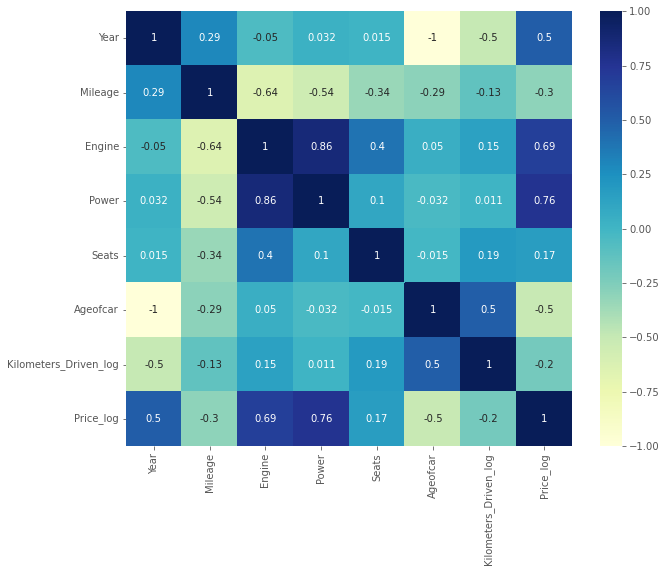

<Figure size 432x288 with 0 Axes>

In [74]:
# Đánh giá tính tương quan  giữa các biến
plt.figure(figsize=(10,8))
sns.heatmap(cars2.corr(),annot=True ,cmap="YlGnBu" )
plt.show()
plt.savefig('D:/7.png')

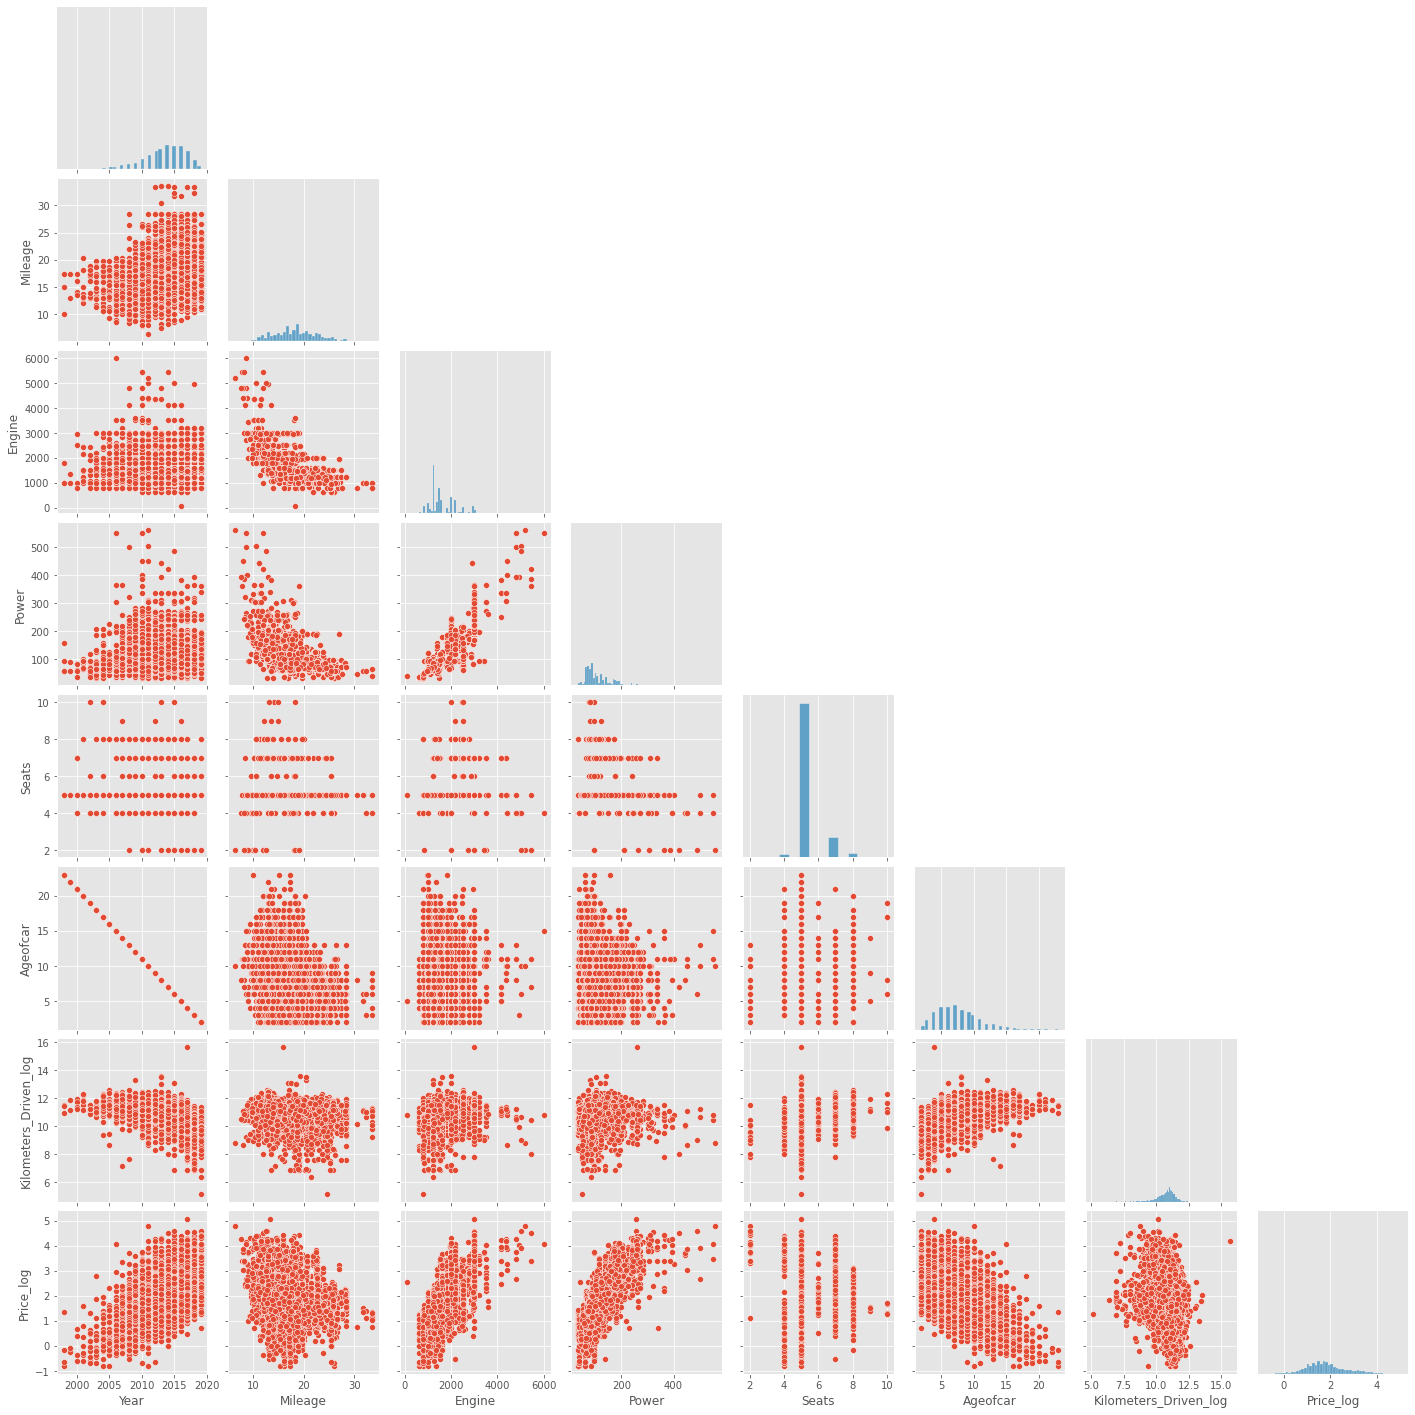

In [75]:
sns.pairplot(data=cars2 , corner=True)
plt.show()

### Các biến có tính tương quan đến với giá

#### Price Vs Engine Vs Transmission

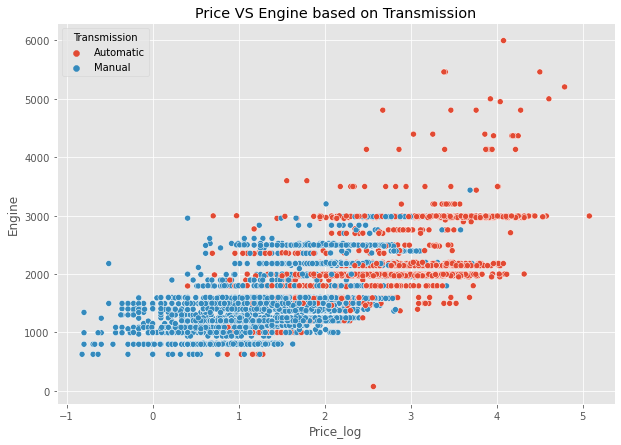

In [76]:
# Đánh giá mối quan hệ giữa Engine vs Price và Transmimssion
plt.figure(figsize=(10,7))

plt.title("Price VS Engine based on Transmission")
sns.scatterplot(y='Engine', x='Price_log', hue='Transmission', data=cars2)

#### Price Vs Power vs Transmission

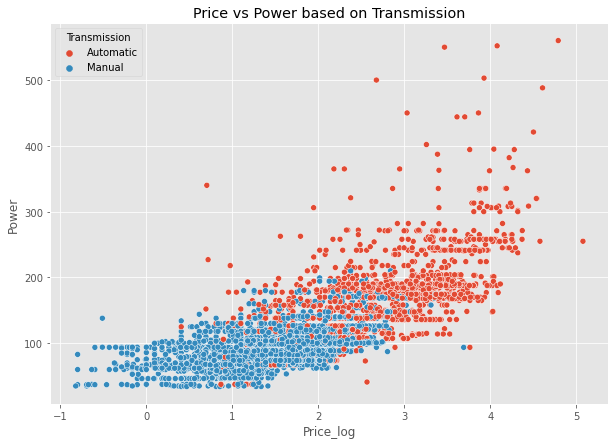

In [77]:
plt.figure(figsize=(10,7))
plt.title("Price vs Power based on Transmission")
sns.scatterplot(y='Power', x='Price_log', hue='Transmission', data=cars2)

#### Price Vs Mileage Vs Transmission

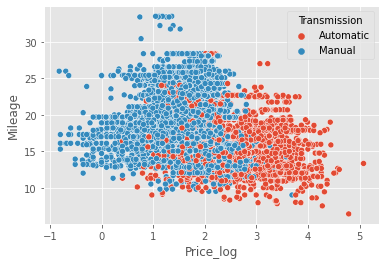

In [78]:
sns.scatterplot(y='Mileage', x='Price_log', hue='Transmission', data=cars2)

#### Price Vs Year Vs Transmission

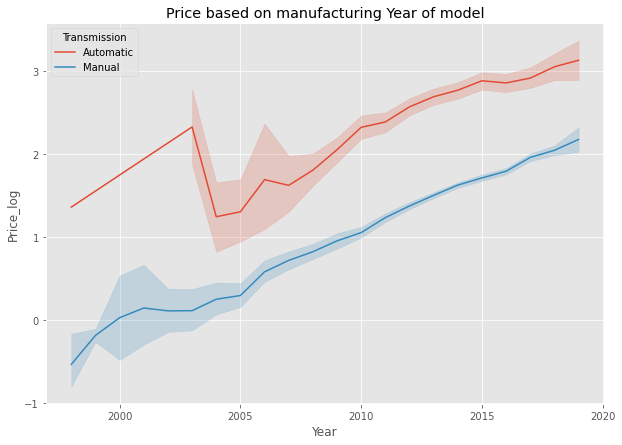

In [79]:
plt.figure(figsize=(10,7))
plt.title("Price based on manufacturing Year of model")
sns.lineplot(x='Year', y='Price_log',hue='Transmission',
             data=cars2)

#### Price Vs Year VS Fuel Type

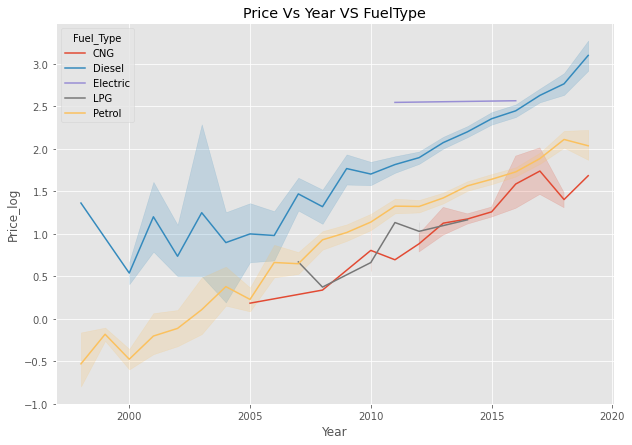

In [80]:
# Impact of years on price 
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS FuelType")
sns.lineplot(x='Year', y='Price_log',hue='Fuel_Type',
             data=cars2)

#### Year Vs Price Vs Owner_Type

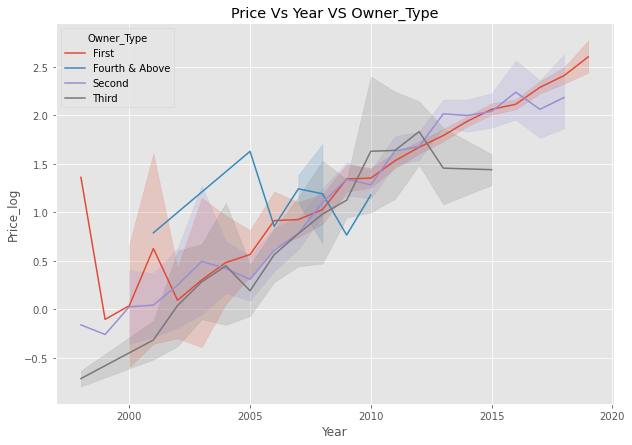

In [81]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Year VS Owner_Type")
sns.lineplot(x='Year', y='Price_log',hue='Owner_Type',
             data=cars2)

#### Price Vs Mileage vs Fuel_type

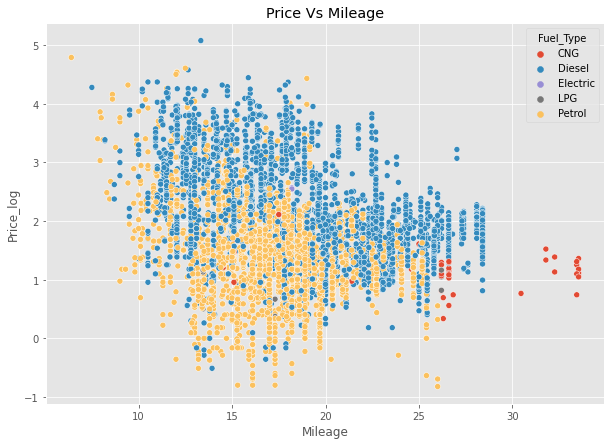

In [82]:
plt.figure(figsize=(10,7))
plt.title("Price Vs Mileage")
sns.scatterplot(y='Price_log', x='Mileage', hue='Fuel_Type', data=cars2)

#### Price Vs Seat

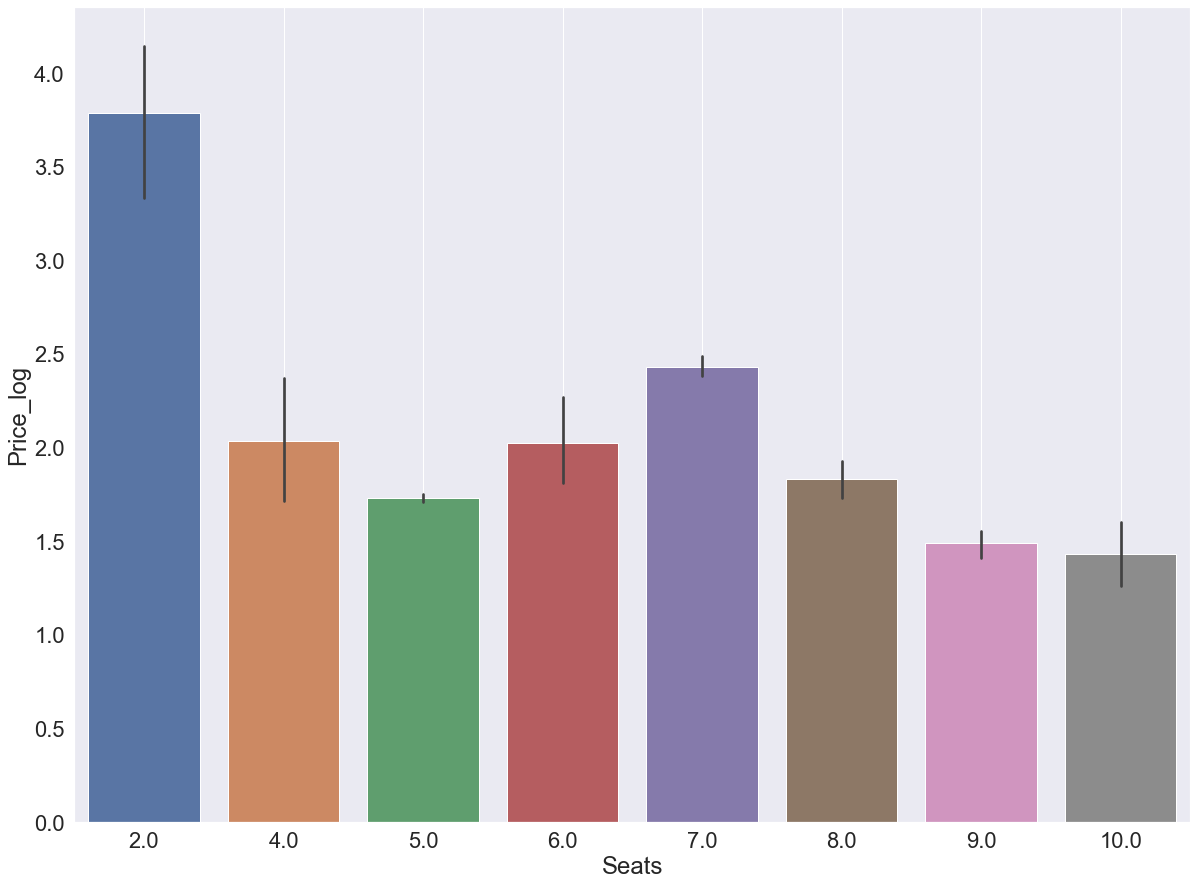

In [83]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Seats', y='Price_log', data=cars2)
plt.grid()

#### Price Vs Location

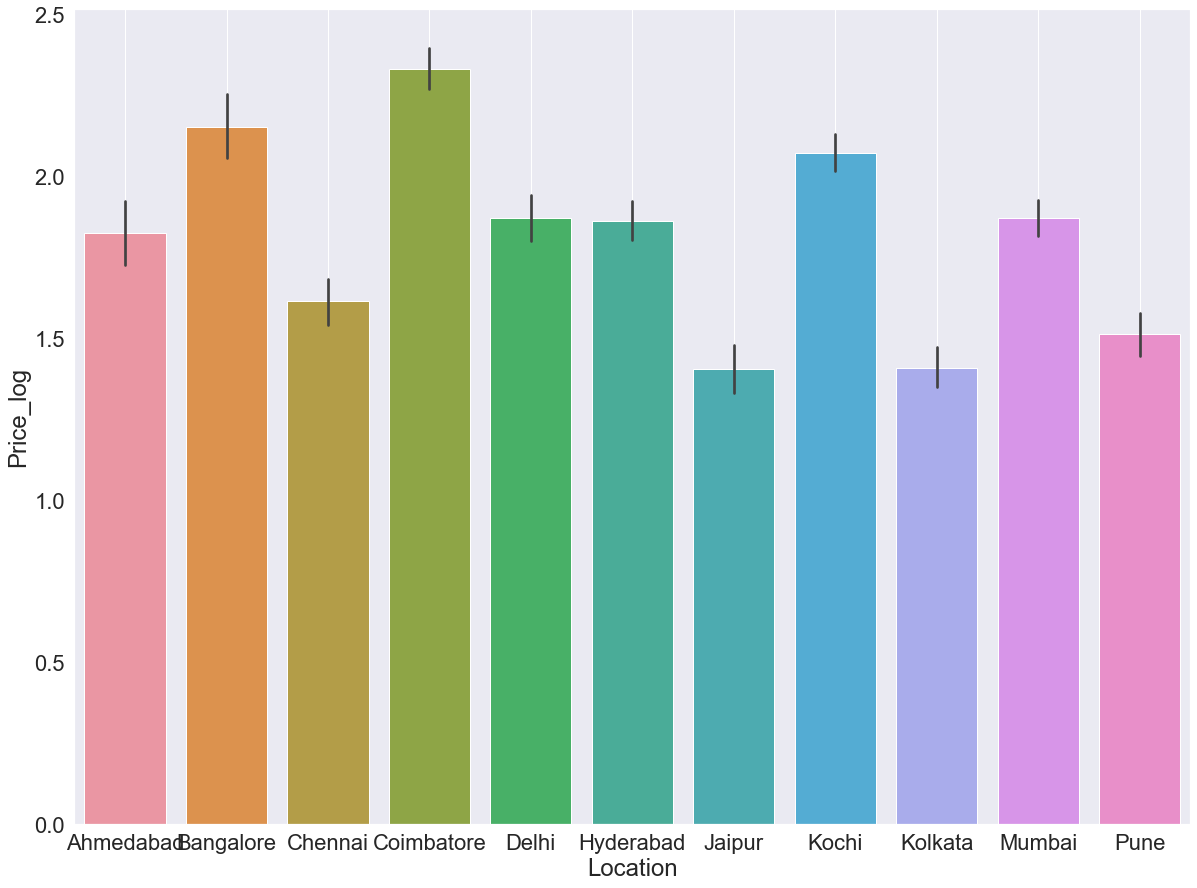

In [84]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.barplot(x='Location', y='Price_log', data=cars2)
plt.grid()

#### Price Vs Brand

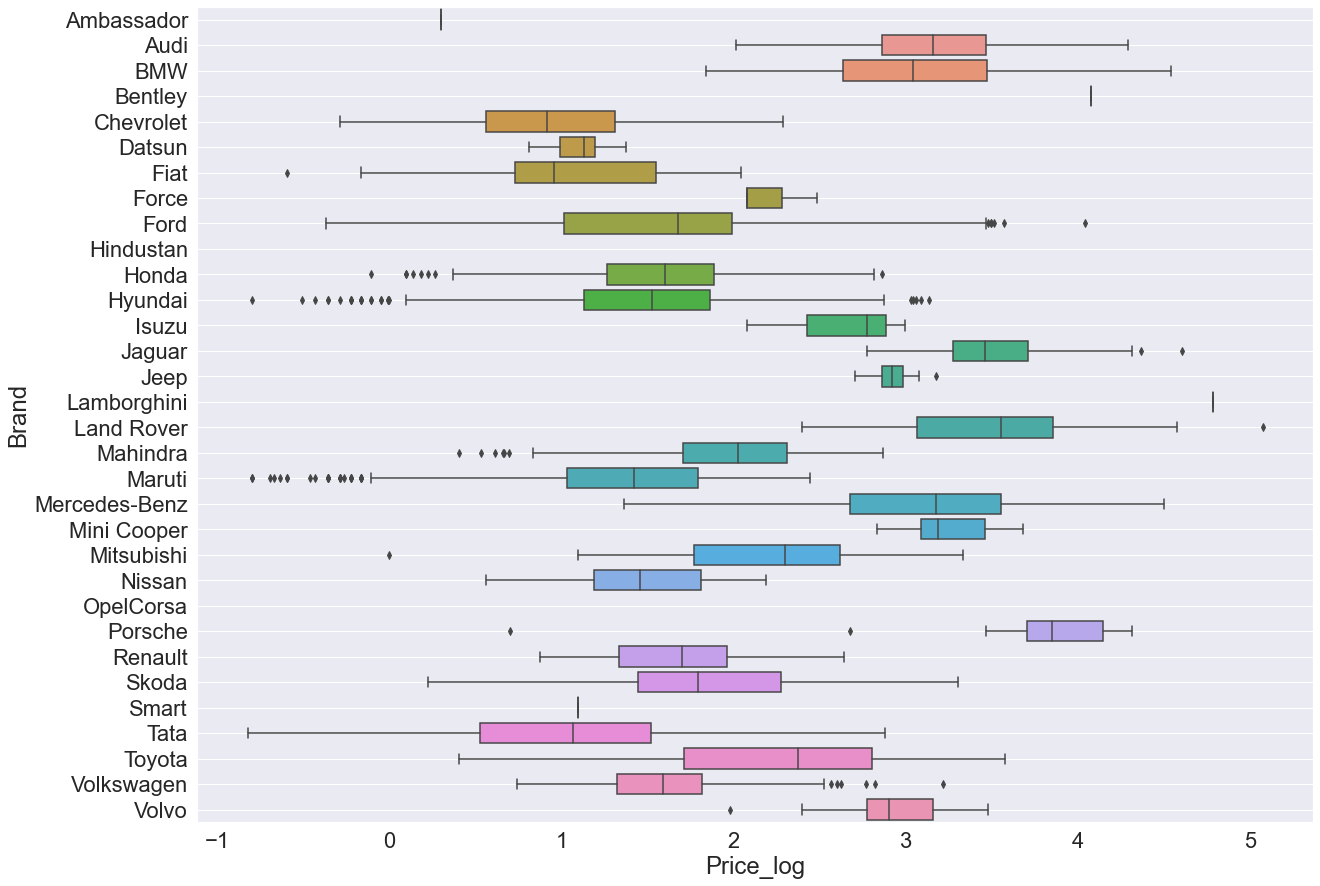

In [85]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.boxplot(x='Price_log', y='Brand', data=cars2)
plt.grid()

<p style = "font-size : 20px ; color: blue;font-family:TimesNewRoman">
<b>Observations</b>
</p>


- Expensive cars are in Coimbatore and Banglore.
- 2 Seater cars are more expensive.
- Deisel Fuel type car are more expensive compared to other fuel type.
- As expected, Older model are sold cheaper compared to latest model
- Automatic transmission vehicle have a higher price than manual transmission vehicles.
- Vehicles with more engine capacity have higher prices. 
- Price decreases as number of owner increases.
- Automatic transmission require high engine and power.
- Prices for Cars with fuel type as Deisel has increased with recent models 
- Engine,Power, how old the car his, Mileage,Fuel type,location,Transmission effect the price.

### Creating dummy variables

In [86]:
cars2.to_csv("D:/ĐỒ ÁN/DoAn2/dữ liệu/data1/used_cars_data_update1.csv")

In [87]:
cars2.drop(['Name','Model','Year','Brand'],axis=1,inplace=True)

In [88]:
def encode_cat_vars(x):
    x = pd.get_dummies(
        x,
        columns=x.select_dtypes(include=["object", "category"]).columns.tolist(),
        drop_first=True,
    )
    return x
cars3 = encode_cat_vars(cars2)
cars3.head(5)

,Mileage,Engine,Power,Seats,Ageofcar,Kilometers_Driven_log,Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,...,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_Class_Low
S.No.,,,,,,,,,,,,,,,,,,,,,
0,26.60,998,58.16,5.0,11,11.184421,0.559616,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,19.67,1582,126.20,5.0,6,10.621327,2.525729,0,0,0,...,1,1,0,0,0,1,0,0,0,1
2,18.20,1199,88.70,5.0,10,10.736397,1.504077,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,20.77,1248,88.76,7.0,9,11.373663,1.791759,0,1,0,...,0,1,0,0,0,1,0,0,0,1
4,15.20,1968,140.80,5.0,8,10.613246,2.875822,0,0,1,...,0,1,0,0,0,0,0,1,0,0


In [89]:
cars3.to_csv("D:/ĐỒ ÁN/DoAn2/dữ liệu/data1/used_cars_data_update.csv")